In [1]:
import ssms 
import lanfactory
import os
import sys
import pickle
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [8]:
files_  = os.listdir('/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models')
files_csv = ['/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/' + file_ for file_ in files_ if 'csv' in file_]

/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/db415ca6008311ec8d90a0423f3e9b42_ddm_torch_training_history.csv
/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/48dbe2ea004d11ecb46da0423f3e9b42_ddm_torch_training_history.csv
/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/50e29a64007b11ecb77ea0423f3e9b42_ddm_torch_training_history.csv
/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/5241cf8a003311ecb46da0423f3e9b42_ddm_torch_training_history.csv


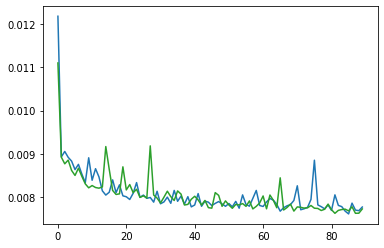

In [13]:
for file_tmp in files_csv:
    print(file_tmp)
    data = pd.read_csv(file_tmp)#['val_Huber'].values[-1]
    plt.plot(data['val_loss'].values[10:])

In [12]:
files_csv

['/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/db415ca6008311ec8d90a0423f3e9b42_ddm_torch_training_history.csv',
 '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/48dbe2ea004d11ecb46da0423f3e9b42_ddm_torch_training_history.csv',
 '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/50e29a64007b11ecb77ea0423f3e9b42_ddm_torch_training_history.csv',
 '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/5241cf8a003311ecb46da0423f3e9b42_ddm_torch_training_history.csv']

In [14]:
pickle.load(open('/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/db415ca6008311ec8d90a0423f3e9b42_ddm_torch__network_config.pickle', 'rb'))

{'layer_types': ['dense', 'dense', 'dense', 'dense'],
 'layer_sizes': [100, 100, 100, 1],
 'activations': ['tanh', 'tanh', 'tanh', 'linear'],
 'loss': 'huber',
 'callbacks': ['checkpoint', 'earlystopping', 'reducelr'],
 'model_id': 'ddm'}

In [5]:
myl = []
idx = 0
for file_ in files_csv:
    tmp = pd.read_csv(file_)
    myl.append([idx, tmp['val_Huber'].values[-1], tmp['val_MSE'].values[-1]])
    idx += 1

KeyError: 'val_Huber'

In [59]:
# TORCH
import os
import pandas as pd
import pickle
from copy import deepcopy 

models = ['weibull', 'levy', 'ornstein', 
          'ddm', 'angle', 
          'par2_no_bias', 'seq2_no_bias', 'mic2_no_bias',
          'par2_angle_no_bias', 'seq2_angle_no_bias', 'mic2_angle_no_bias',
          'par2_weibull_no_bias', 'seq2_weibull_no_bias', 'mic2_weibull_no_bias']


filters_ = models
path_ = '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models'
model_wise_pds = []

for filter_ in filters_:
    pds = {}
    models_tmp = deepcopy(models)
    models_tmp.remove(filter_)
    
    for file_ in os.listdir(path_):
        if filter_ in file_ and not (filter_ in models_tmp):
            if 'training_history' in file_:
                pd_tmp = pd.read_csv(path_ + '/' + file_)
                pd_tmp['model_id'] = file_[:file_.find('_')]
                pd_tmp['filename'] = file_
                pd_tmp['path'] = path_ + '/' + file_
                pd_tmp['model_type'] = filter_
                pds[file_[:file_.find('_')]] = pd_tmp


    for m_id in pds.keys():
        for file_ in os.listdir(path_):
            if m_id in file_ and 'network_config' in file_:
                network_config_tmp = pickle.load(open(path_ + '/' + file_, 'rb'))
                pds[m_id]['n_hidden_layers'] = len(network_config_tmp['layer_sizes']) - 1
                pds[m_id]['size_hidden_layers'] = network_config_tmp['layer_sizes'][0]
            #print(network_config_tmp)

    training_dat = pd.concat([pds[m_id] for m_id in pds.keys()]).reset_index(drop = True)

    best_models_pds = []
    for n_h_l in training_dat['n_hidden_layers'].unique():
        for s_h_l in training_dat['size_hidden_layers'].unique():
            training_dat_sub = training_dat.loc[(training_dat['n_hidden_layers'] == n_h_l) & \
                                                (training_dat['size_hidden_layers'] == s_h_l) & \
                                                (training_dat['epoch'] == training_dat['epoch'].max()), :]
            val_loss_min = training_dat_sub['val_loss'].min()
            best_models_pds.append(training_dat_sub.loc[training_dat_sub['val_loss'] == val_loss_min, :])
        
        
    best_models_dat = pd.concat(best_models_pds)
    model_wise_pds.append(best_models_dat)
    
full_dat = pd.concat(model_wise_pds).reset_index(drop = True).drop(['Unnamed: 0'], axis = 1)

In [39]:
# Make dataframe that splits by unique n_hidden layers and unique size hidden layers
# --> Stores min val loss
# --> Stores filename

In [94]:
full_dat

,epoch,val_loss,model_id,filename,path,model_type,n_hidden_layers,size_hidden_layers
0,99.0,0.002694,44deb16a127f11eca325a0423f39b436,44deb16a127f11eca325a0423f39b436_weibull_torch...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,weibull,3,100
1,99.0,0.007919,80dec298152e11ec88b8ac1f6bfea5a4,80dec298152e11ec88b8ac1f6bfea5a4_levy_torch_tr...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,levy,3,100
2,99.0,0.008914,1f496b50127211ecb6943cecef057438,1f496b50127211ecb6943cecef057438_ornstein_torc...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,ornstein,3,100
3,99.0,0.008101,d27193a4153011ecb76ca0423f39a3e6,d27193a4153011ecb76ca0423f39a3e6_ddm_torch_tra...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,ddm,3,100
4,99.0,0.001854,eba53550128911ec9fef3cecef056d26,eba53550128911ec9fef3cecef056d26_angle_torch_t...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,angle,3,100
...,...,...,...,...,...,...,...,...
81,19.0,0.002830,40fc802c162111ecacc0ac1f6bfea5a4,40fc802c162111ecacc0ac1f6bfea5a4_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,3,120
82,19.0,0.002896,ab78c558162d11ec98193cecef056d26,ab78c558162d11ec98193cecef056d26_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,3,150
83,19.0,0.002820,4a420fec161911eca5d63cecef057012,4a420fec161911eca5d63cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,4,100
84,19.0,0.002751,87259650162c11ec92263cecef057012,87259650162c11ec92263cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,4,120


In [60]:
full_dat

,epoch,val_loss,model_id,filename,path,model_type,n_hidden_layers,size_hidden_layers
0,99.0,0.002694,44deb16a127f11eca325a0423f39b436,44deb16a127f11eca325a0423f39b436_weibull_torch...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,weibull,3,100
1,99.0,0.007919,80dec298152e11ec88b8ac1f6bfea5a4,80dec298152e11ec88b8ac1f6bfea5a4_levy_torch_tr...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,levy,3,100
2,99.0,0.008914,1f496b50127211ecb6943cecef057438,1f496b50127211ecb6943cecef057438_ornstein_torc...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,ornstein,3,100
3,99.0,0.008101,d27193a4153011ecb76ca0423f39a3e6,d27193a4153011ecb76ca0423f39a3e6_ddm_torch_tra...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,ddm,3,100
4,99.0,0.001854,eba53550128911ec9fef3cecef056d26,eba53550128911ec9fef3cecef056d26_angle_torch_t...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,angle,3,100
...,...,...,...,...,...,...,...,...
81,19.0,0.002830,40fc802c162111ecacc0ac1f6bfea5a4,40fc802c162111ecacc0ac1f6bfea5a4_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,3,120
82,19.0,0.002896,ab78c558162d11ec98193cecef056d26,ab78c558162d11ec98193cecef056d26_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,3,150
83,19.0,0.002820,4a420fec161911eca5d63cecef057012,4a420fec161911eca5d63cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,4,100
84,19.0,0.002751,87259650162c11ec92263cecef057012,87259650162c11ec92263cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,4,120


In [98]:
full_dat.loc[full_dat['model_type'] == 'mic2_weibull_no_bias', :]

,epoch,val_loss,model_id,filename,path,model_type,n_hidden_layers,size_hidden_layers
77,19.0,0.002864,e26199a0162311ec833c3cecef057012,e26199a0162311ec833c3cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,5,100
78,19.0,0.002913,e8cac65e162311ec8c273cecef056d26,e8cac65e162311ec8c273cecef056d26_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,5,120
79,19.0,0.002843,d07ae392162611ecbfee3cecef057012,d07ae392162611ecbfee3cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,5,150
80,19.0,0.002963,032a66f4161911ec859b3cecef057012,032a66f4161911ec859b3cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,3,100
81,19.0,0.002830,40fc802c162111ecacc0ac1f6bfea5a4,40fc802c162111ecacc0ac1f6bfea5a4_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,3,120
82,19.0,0.002896,ab78c558162d11ec98193cecef056d26,ab78c558162d11ec98193cecef056d26_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,3,150
83,19.0,0.002820,4a420fec161911eca5d63cecef057012,4a420fec161911eca5d63cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,4,100
84,19.0,0.002751,87259650162c11ec92263cecef057012,87259650162c11ec92263cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,4,120
85,19.0,0.002786,8ac50418162611ecbeba3cecef057012,8ac50418162611ecbeba3cecef057012_mic2_weibull_...,/users/afengler/data/proj_lan_pipeline/LAN_scr...,mic2_weibull_no_bias,4,150


In [93]:
full_dat.loc[full_dat['model_type'] == 'par2_angle_no_bias', :]['path'].values

array(['/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/625fb06e160c11ecbbe73cecef057012_mic2_angle_no_bias_torch_training_history.csv',
       '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/08c3c268160f11eca45f3cecef057012_mic2_angle_no_bias_torch_training_history.csv',
       '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/5a2ad60e160111ec9cb53cecef056d26_mic2_angle_no_bias_torch_training_history.csv',
       '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/ae67e6c6160111ecb0183cecef056d26_mic2_angle_no_bias_torch_training_history.csv',
       '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/215d72b6160e11ecb7463cecef056d26_mic2_angle_no_bias_torch_training_history.csv',
       '/users/afengler/data/proj_lan_pipeline/LAN_scripts/data/torch_models/caf248a0160011eca3b23cecef057012_mic2_angle_no_bias_torch_training_history.csv',
       '/users/afengler/data/proj_lan_pipeline/LAN_s

In [89]:
74ca5d6c161b11ec9ebb3cecef056d26

NameError: name 'c611f4ca15dd11ec89543cecef056d26' is not defined

In [30]:
training_data['val_loss'] == val_loss_min

NameError: name 'training_data' is not defined

In [ ]:
os